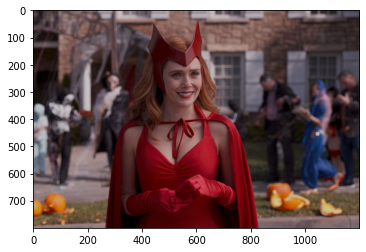

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import timeit
import numpy as np
import random

cfg_file = '/Users/patricklo/src/pycharm/trial/yolo/yolov4-tiny.cfg'
weight_file = '/Users/patricklo/src/pycharm/trial/yolo/yolov4-tiny.weights'
objname_file = '/Users/patricklo/src/pycharm/trial/yolo/coco.names'

mydnn = cv.dnn.readNetFromDarknet(cfg_file, weight_file)

mydnn.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
mydnn.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)
wanda = plt.imread('/Users/patricklo/Downloads/wandavision.jpg')
plt.imshow(wanda)

In [4]:
blob = cv.dnn.blobFromImage(wanda,0.00392, (608,608), [0,0,0], 1, crop=False)
mydnn.setInput(blob)

layerNames_temp = mydnn.getUnconnectedOutLayers() #get the indices of the yolo output layer
layer_i_yolo = [i - 1 for i in layerNames_temp]
layerNames = [mydnn.getLayerNames()[i] for i in layer_i_yolo]
print(layerNames)

t1 = timeit.default_timer()
netoutput = mydnn.forward(layerNames)
t2 = timeit.default_timer()
print(t2-t1)

['yolo_30', 'yolo_37']
0.12849270899999965


In [5]:
objnames = []
with open(objname_file) as file:
    for line in file:
        objnames.append(line.rstrip())
print(objnames)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
boxes = []
for what in netoutput:
    # print(len(what)) each output 1083, 4332
    for sth in what:
        #with each output, the output will be 5 + class number
        if sth[4] > 0.5:
            box = [sth[0], sth[1], sth[2], sth[3]]
        for i in range(len(objnames)):
            if sth[i+5] > 0.5:
                box.append(sth[i+5])
                box.append(objnames[i])
                boxes.append(box)

In [7]:
#nms
indices = cv.dnn.NMSBoxes(list(item[0:4] for item in boxes),list(item[4] for item in boxes), 0.1, 0.1)

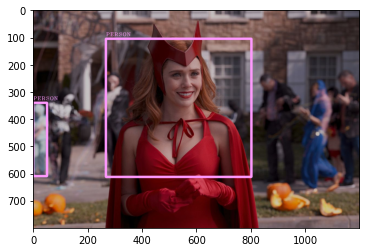

In [8]:
for what in indices:
    pt0 = (  int(  np.shape(wanda)[1] * (boxes[what][0] - boxes[what][2] / 2) ), \
             int(  np.shape(wanda)[0] * (boxes[what][1] - boxes[what][3] / 2) ) )
    pt1 = (  int(  np.shape(wanda)[1] * (boxes[what][0] + boxes[what][2] / 2) ), \
             int(  np.shape(wanda)[0] * (boxes[what][1] + boxes[what][3] / 2) ) )

    cv.rectangle(wanda, pt0, pt1, (255, 153, 255), 8)
    cv.putText(wanda, boxes[what][5].upper(), (pt0[0], pt0[1]-10),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(255,153,255))
    plt.imshow(wanda)
    plt.imsave('/Users/patricklo/src/pycharm/trial/yolo/result.jpg', wanda)

In [9]:
print(t2-t1)

0.12849270899999965
